## Importing important dependances 

In [53]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
print("hello")


hello


## reading csv file

In [54]:
data = pd.read_csv(r"C:\Users\Kausar Ali\tweetcsv\newMergeDF2.csv")
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Names,Tweets,Locations
0,0,0,0,Afiali9,@RehamKhan1 Haha received by 4 people and happ...,NaN
1,1,1,1,GirlPrestigious,Pakistan pushed to danger zone by Traitors … Y...,"Toronto, Ontario"
2,2,2,2,Faria_Khan_,Wow! Mardan has turned out! #MarchAgainstlmpor...,NaN
3,3,3,3,Shoaibska,@OryaMaqboolJan True \n #امپورٹڈ_حکومت_نامنظور,"San Francisco, CA"
4,4,4,4,beena_681,@ChannFaqeer @rafique5522 @PTIofficial Mr Faqe...,"Croydon, London"
...,...,...,...,...,...,...
164969,164969,49995,49995,Zain_Ul_Abadeen,@tayyabsecret Wrong hashtag\n\n#امپورٹڈ_حکومت_...,Pakistan
164970,164970,49996,49996,SohailM56161493,@RehamKhan1 You should be ashamed of yourself ...,NaN
164971,164971,49997,49997,ObaidAw3007,Look who followed me😍\nThank you @KazmiWajahat...,"Chakwal, Pakistan"
164972,164972,49998,49998,RansWasi,@GovtofPakistan Crime Minister Not Accepted 🚫\...,"Multan, Pakistan"


In [55]:
data['Tweets']

0         @RehamKhan1 Haha received by 4 people and happ...
1         Pakistan pushed to danger zone by Traitors … Y...
2         Wow! Mardan has turned out! #MarchAgainstlmpor...
3            @OryaMaqboolJan True \n #امپورٹڈ_حکومت_نامنظور
4         @ChannFaqeer @rafique5522 @PTIofficial Mr Faqe...
                                ...                        
164969    @tayyabsecret Wrong hashtag\n\n#امپورٹڈ_حکومت_...
164970    @RehamKhan1 You should be ashamed of yourself ...
164971    Look who followed me😍\nThank you @KazmiWajahat...
164972    @GovtofPakistan Crime Minister Not Accepted 🚫\...
164973    @Abdullahtanhap2 @mws_9221 Wrong hashtag\n\n#ا...
Name: Tweets, Length: 164974, dtype: object

In [57]:
df1=data

# data preprocessing

### Removing unnecessary columns

In [61]:
data.drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1"], axis=1, inplace=True)


In [62]:
data.head()

,Names,Tweets,Locations
0,Afiali9,@RehamKhan1 Haha received by 4 people and happ...,NaN
1,GirlPrestigious,Pakistan pushed to danger zone by Traitors … Y...,"Toronto, Ontario"
2,Faria_Khan_,Wow! Mardan has turned out! #MarchAgainstlmpor...,NaN
3,Shoaibska,@OryaMaqboolJan True \n #امپورٹڈ_حکومت_نامنظور,"San Francisco, CA"
4,beena_681,@ChannFaqeer @rafique5522 @PTIofficial Mr Faqe...,"Croydon, London"


### Dealing with missing values

In [63]:
data.isnull().sum()

Names            0
Tweets           0
Locations    69216
dtype: int64

In [64]:
data['Locations'].value_counts()

Pakistan               8564
Lahore, Pakistan       5850
Karachi, Pakistan      4876
Islamabad, Pakistan    4624
London, England        2820
                       ... 
Easter Island             2
ISLAMABADPAKISTAN         2
Kyiv, Ukraine             2
Kashmir                   2
PK/UK                     2
Name: Locations, Length: 4066, dtype: int64

In [65]:
data["Locations"].replace(to_replace=np.nan, value="Lahore", inplace=True)

In [66]:
data

,Names,Tweets,Locations
0,Afiali9,@RehamKhan1 Haha received by 4 people and happ...,Lahore
1,GirlPrestigious,Pakistan pushed to danger zone by Traitors … Y...,"Toronto, Ontario"
2,Faria_Khan_,Wow! Mardan has turned out! #MarchAgainstlmpor...,Lahore
3,Shoaibska,@OryaMaqboolJan True \n #امپورٹڈ_حکومت_نامنظور,"San Francisco, CA"
4,beena_681,@ChannFaqeer @rafique5522 @PTIofficial Mr Faqe...,"Croydon, London"
...,...,...,...
164969,Zain_Ul_Abadeen,@tayyabsecret Wrong hashtag\n\n#امپورٹڈ_حکومت_...,Pakistan
164970,SohailM56161493,@RehamKhan1 You should be ashamed of yourself ...,Lahore
164971,ObaidAw3007,Look who followed me😍\nThank you @KazmiWajahat...,"Chakwal, Pakistan"
164972,RansWasi,@GovtofPakistan Crime Minister Not Accepted 🚫\...,"Multan, Pakistan"


In [67]:
data['Locations'].value_counts()

Lahore                 70392
Pakistan                8564
Lahore, Pakistan        5850
Karachi, Pakistan       4876
Islamabad, Pakistan     4624
                       ...  
Easter Island              2
ISLAMABADPAKISTAN          2
Kyiv, Ukraine              2
Kashmir                    2
PK/UK                      2
Name: Locations, Length: 4066, dtype: int64

# tweets

In [73]:
df['Tweets']

0         @RehamKhan1 Haha received by 4 people and happ...
1         Pakistan pushed to danger zone by Traitors … Y...
2         Wow! Mardan has turned out! #MarchAgainstlmpor...
3            @OryaMaqboolJan True \n #امپورٹڈ_حکومت_نامنظور
4         @ChannFaqeer @rafique5522 @PTIofficial Mr Faqe...
                                ...                        
164969    @tayyabsecret Wrong hashtag\n\n#امپورٹڈ_حکومت_...
164970    @RehamKhan1 You should be ashamed of yourself ...
164971    Look who followed me😍\nThank you @KazmiWajahat...
164972    @GovtofPakistan Crime Minister Not Accepted 🚫\...
164973    @Abdullahtanhap2 @mws_9221 Wrong hashtag\n\n#ا...
Name: Tweets, Length: 164974, dtype: object

## cleaning Tweets

In [69]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Tweets"] = data["Tweets"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\Kausar
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
data["Tweets"]

0          haha receiv  peopl happili share video joker ...
1         pakistan push danger zone traitor … ya allah r...
2         wow mardan turn marchagainstlmportedgovt امپور...
3                  oryamaqbooljan true  امپورٹڈحکومتنامنظور
4         channfaq  ptioffici mr faqeer chanim free citi...
                                ...                        
164969    tayyabsecret wrong hashtagامپورٹڈحکومتنامنظورا...
164970     asham unfortun cheap characterامپورٹڈحکومتنام...
164971    look follow me😍thank kazmiwajahat امپورٹڈحکومت...
164972    govtofpakistan crime minist accept 🚫امپورٹڈحکو...
164973      wrong hashtagامپورٹڈحکومتنامنظورالیکشنکمشنرن...
Name: Tweets, Length: 164974, dtype: object

### with sentimentIntensityAnalyzer we are giving score to each tweets

In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Tweets"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Tweets"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Tweets"]]

[nltk_data] Downloading package vader_lexicon to C:\Users\Kausar
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Displaying tweets regrading positve, negative, neutral columns

In [76]:
data = data[["Tweets", "Positive", 
             "Negative", "Neutral"]]
print(data.head())

                                              Tweets  Positive  Negative  \
0   haha receiv  peopl happili share video joker ...     0.528     0.000   
1  pakistan push danger zone traitor … ya allah r...     0.000     0.254   
2  wow mardan turn marchagainstlmportedgovt امپور...     0.487     0.000   
3           oryamaqbooljan true  امپورٹڈحکومتنامنظور     0.583     0.000   
4  channfaq  ptioffici mr faqeer chanim free citi...     0.126     0.107   

   Neutral  
0    0.472  
1    0.746  
2    0.513  
3    0.417  
4    0.766  


In [94]:
data

,Tweets,Positive,Negative,Neutral
0,haha receiv peopl happili share video joker ...,0.528,0.000,0.472
1,pakistan push danger zone traitor … ya allah r...,0.000,0.254,0.746
2,wow mardan turn marchagainstlmportedgovt امپور...,0.487,0.000,0.513
3,oryamaqbooljan true امپورٹڈحکومتنامنظور,0.583,0.000,0.417
4,channfaq ptioffici mr faqeer chanim free citi...,0.126,0.107,0.766
...,...,...,...,...
164969,tayyabsecret wrong hashtagامپورٹڈحکومتنامنظورا...,0.000,0.608,0.392
164970,asham unfortun cheap characterامپورٹڈحکومتنام...,0.000,0.000,1.000
164971,look follow me😍thank kazmiwajahat امپورٹڈحکومت...,0.000,0.000,1.000
164972,govtofpakistan crime minist accept 🚫امپورٹڈحکو...,0.286,0.385,0.330


### separating each row with sentiment_score function 
### to Positive, negative, neutral

In [77]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [78]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  19221.909999999672
Negative:  9940.682000000026
Neutral:  135779.61400000073


## Visualization of data

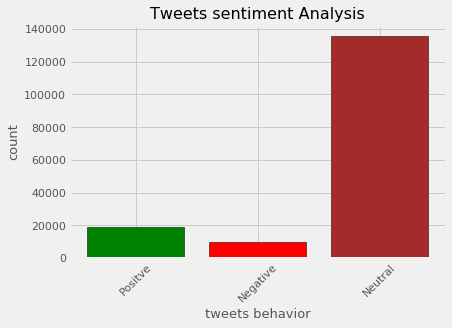

<Figure size 1440x1296 with 0 Axes>

In [80]:
x = ["Positve", "Negative", "Neutral"]
y=[19221,9940, 135779]

plt.bar(x, y, color=['g', 'r','brown'], edgecolor="black")
plt.title('Tweets sentiment Analysis', fontsize=16)
plt.ylabel("count", fontsize=13)
plt.xlabel("tweets behavior", fontsize=13)
plt.xticks(rotation=45,fontsize=11)
plt.yticks(fontsize=11)
plt.figure(figsize=(20,18))
style.use('fivethirtyeight')
plt.show()   

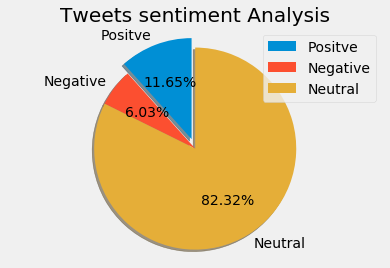

In [81]:
plt.style.use("fivethirtyeight")
slices = [19221,9940, 135779]
labels = ["Positve", "Negative", "Neutral"]
explode=(0.1, 0,0)
plt.pie(slices, explode=explode,labels=labels, autopct='%.2f%%', shadow=True, startangle=90)
plt.title('Tweets sentiment Analysis')
plt.axis('equal')
plt.legend(loc='upper right')
plt.style.use('ggplot')
plt.show()